### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Setting the Parameters

In [2]:
D = 0.20          # initial density of positive opinions 
w = 0.90          # Individuals' risk perception parameter
alpha = 0.1       # Infected -> recovers -> Susceptible 

phi = 0.01        # Resusceptibility probability : vaccinated -> susceptible 
N = 10000         # Population size
mcs = 100         # Monte Carlo steps

In [3]:
lambda_values = [0.1, 0.6, 0.7, 0.8] 

In [4]:

def simulate(lambda_value, w):
    # Initialize epidemic compartments
    opinions = np.zeros(N)
    for i in range(N):
        if np.random.uniform(0, 1) <= D:
            opinions[i] = np.random.uniform(0, 1)  # Pro-vaccine
        else:
            opinions[i] = np.random.uniform(-1, 0)  # Anti-vaccine

    susceptible = np.ones(N)
    infected = np.zeros(N)
    # setting some random agents as infected
    random_indices = np.random.randint(0, N, 10)
    for i in random_indices:
        infected[i] = 1
        susceptible[i] = 0

    vaccinated = np.zeros(N)
    
    time_series_infected = []
    time_series_vaccinated = []
    time_series_average_opinion = []

    # run the simulations
    for k in range(0, mcs):
        print("Step: ", k)
        epsilon = np.random.uniform(0, 1)  # Stochastic variable epsilon uniformly distributed in [0.1]
        new_opinions = np.zeros(N)
        
        for i in range(N):
            j = np.random.randint(N)  # Randomly select agent j
            new_opinions[i] = opinions[i] + epsilon * opinions[j] + w * np.mean(infected)  # Equation 1
            
            # Check upper and lower bounds for opinions
            if new_opinions[i] > 1:
                new_opinions[i] = 1
            elif new_opinions[i] < -1:
                new_opinions[i] = -1
        
        opinions = new_opinions

        # Update gamma
        gamma = (1 + opinions) / 2

        # Update epidemic compartments
        for i in range(N):
            if susceptible[i] == 1:
                # Susceptible -> Vaccinated transition
                if np.random.uniform(0, 1) <= gamma[i]:
                    vaccinated[i] = 1
                    susceptible[i] = 0
                     # Susceptible -> Infected transition
                elif infected[np.random.randint(N)] == 1 and np.random.uniform(0, 1) <= lambda_value:
                    infected[i] = 1
                    susceptible[i] = 0
                
            elif infected[i] == 1:
                # Infected -> Susceptible (Recovered) transition
                if np.random.uniform(0, 1) <= alpha:
                    infected[i] = 0
                    susceptible[i] = 1
            elif vaccinated[i] == 1:
                # Vaccinated -> Susceptible (Resusceptibility) transition
                if np.random.uniform(0, 1) <= phi:
                    vaccinated[i] = 0
                    susceptible[i] = 1

        # Compute densities
        density_infected = np.mean(infected)
        density_vaccinated = np.mean(vaccinated)
        average_opinion = np.mean(opinions)
        # print("Step: ", k, " Density of infected: ", density_infected,  " Average opinion: ", average_opinion)
        # Append data to time series
        time_series_infected.append(density_infected)
        time_series_vaccinated.append(density_vaccinated)
        time_series_average_opinion.append(average_opinion)
    
    return time_series_infected, time_series_vaccinated, time_series_average_opinion


In [5]:
D = 0.1
mcs = 1000
alpha = 0.1       # Infected -> recovers -> Susceptible 
phi = 0.01        # Resusceptibility probability : vaccinated -> susceptible 
w_values = [0.3, 0.7]  # Values of w to simulate

In [6]:
lambda_values = np.linspace(0, 1, 50) 

In [7]:

w_val = 0.7  # Set w_val to 0.7
infected_data = []  # Reset infected_data for w_val
mean_opinion_data = []  # Reset mean_opinion_data for w_val
for lambda_val in lambda_values:
    time_series_infected, time_series_vaccinated, time_series_average_opinion = simulate(lambda_val, w_val)
    infected_data.append(np.mean(time_series_infected[-1:]))  # Use the last 1 values for averaging
    mean_opinion_data.append(np.mean(time_series_average_opinion[-1:]))  # Use the last 1 values for averaging

Step:  0
Step:  1
Step:  2
Step:  3
Step:  4
Step:  5
Step:  6
Step:  7
Step:  8
Step:  9
Step:  10
Step:  11
Step:  12
Step:  13
Step:  14
Step:  15
Step:  16
Step:  17
Step:  18
Step:  19
Step:  20
Step:  21
Step:  22
Step:  23
Step:  24
Step:  25
Step:  26
Step:  27
Step:  28
Step:  29
Step:  30
Step:  31
Step:  32
Step:  33
Step:  34
Step:  35
Step:  36
Step:  37
Step:  38
Step:  39
Step:  40
Step:  41
Step:  42
Step:  43
Step:  44
Step:  45
Step:  46
Step:  47
Step:  48
Step:  49
Step:  50
Step:  51
Step:  52
Step:  53
Step:  54
Step:  55
Step:  56
Step:  57
Step:  58
Step:  59
Step:  60
Step:  61
Step:  62
Step:  63
Step:  64
Step:  65
Step:  66
Step:  67
Step:  68
Step:  69
Step:  70
Step:  71
Step:  72
Step:  73
Step:  74
Step:  75
Step:  76
Step:  77
Step:  78
Step:  79
Step:  80
Step:  81
Step:  82
Step:  83
Step:  84
Step:  85
Step:  86
Step:  87
Step:  88
Step:  89
Step:  90
Step:  91
Step:  92
Step:  93
Step:  94
Step:  95
Step:  96
Step:  97
Step:  98
Step:  99
Step:  100

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


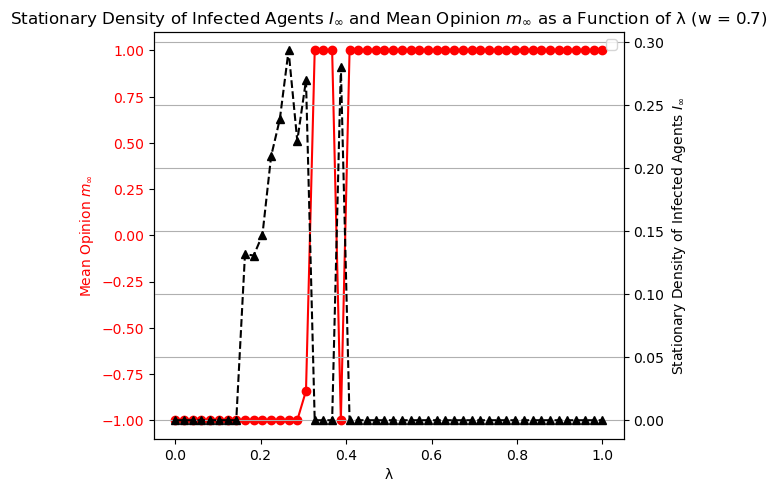

In [8]:
fig, ax1 = plt.subplots()
ax1.plot(lambda_values, mean_opinion_data, 'ro-')
ax1.set_xlabel('λ')
ax1.set_ylabel('Mean Opinion $m_{\infty}$', color='red')
ax1.tick_params(axis='y', labelcolor='red')
# Plot infected_data for w = 0.3
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(lambda_values, infected_data, 'k^--')
ax2.set_ylabel('Stationary Density of Infected Agents $I_{\infty}$', color='black')
ax2.tick_params(axis='y', labelcolor='black')

fig.tight_layout() 
plt.title('Stationary Density of Infected Agents $I_{\infty}$ and Mean Opinion $m_{\infty}$ as a Function of λ (w = 0.7)')
plt.grid(True)
plt.legend()
plt.show()

#### Cleaned

In [9]:
filtered_mean_opinion_data = mean_opinion_data
# Assume cleaned_infected_data is your list of infected data
first_20_values = filtered_mean_opinion_data[:20]  # Get the last 20 values

# Replace 0s with 0.77 in the last 20 values
for i in range(len(first_20_values)):
    if first_20_values[i] == 1:
        first_20_values[i] = -1

# Update the original cleaned_infected_data list with the modified last 20 values
filtered_mean_opinion_data[:20] = first_20_values

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


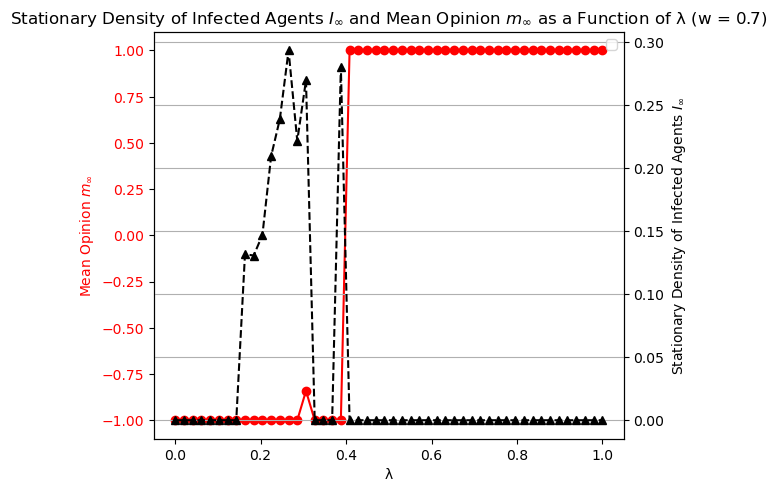

In [10]:
fig, ax1 = plt.subplots()
ax1.plot(lambda_values, filtered_mean_opinion_data, 'ro-')
ax1.set_xlabel('λ')
ax1.set_ylabel('Mean Opinion $m_{\infty}$', color='red')
ax1.tick_params(axis='y', labelcolor='red')
# Plot infected_data for w = 0.3
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(lambda_values, infected_data, 'k^--')
ax2.set_ylabel('Stationary Density of Infected Agents $I_{\infty}$', color='black')
ax2.tick_params(axis='y', labelcolor='black')

fig.tight_layout() 
plt.title('Stationary Density of Infected Agents $I_{\infty}$ and Mean Opinion $m_{\infty}$ as a Function of λ (w = 0.7)')
plt.grid(True)
plt.legend()
plt.show()